In [2]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
# Prepare the dataset for analysis
# Read in csv file
file_path = "Conditions_Contributing_to_COVID-19_Deaths__by_State_and_Age__Provisional_2020-2023.csv"
inital_df = pd.read_csv(file_path)

# Drop the unwanted columns.
inital_df = inital_df.drop(columns=['Data As Of', 'Start Date', 'End Date', 'ICD10_codes', 'Number of Mentions', 'Flag'])

# Only keep the rows where the Group is "By Month", and delete the row where Age Group is "All Ages"
inital_df = inital_df.loc[inital_df['Group'] == 'By Month']
clean_df = inital_df.loc[inital_df['Age Group'] != 'All Ages']

# Drop the NaN values
clean_df = clean_df.dropna()

# Convert Year and Month columns to integers
clean_df.loc[:, 'Year'] = clean_df['Year'].astype(int)
clean_df.loc[:, 'Month'] = clean_df['Month'].astype(int)
clean_df.loc[:, 'COVID-19 Deaths'] = clean_df['COVID-19 Deaths'].astype(int)

clean_df.head()

,Group,Year,Month,State,Condition Group,Condition,Age Group,COVID-19 Deaths
62100,By Month,2020,1,United States,Respiratory diseases,Influenza and pneumonia,0-24,0
62101,By Month,2020,2,United States,Respiratory diseases,Influenza and pneumonia,0-24,0
62102,By Month,2020,3,United States,Respiratory diseases,Influenza and pneumonia,0-24,9
62103,By Month,2020,4,United States,Respiratory diseases,Influenza and pneumonia,0-24,27
62104,By Month,2020,5,United States,Respiratory diseases,Influenza and pneumonia,0-24,19


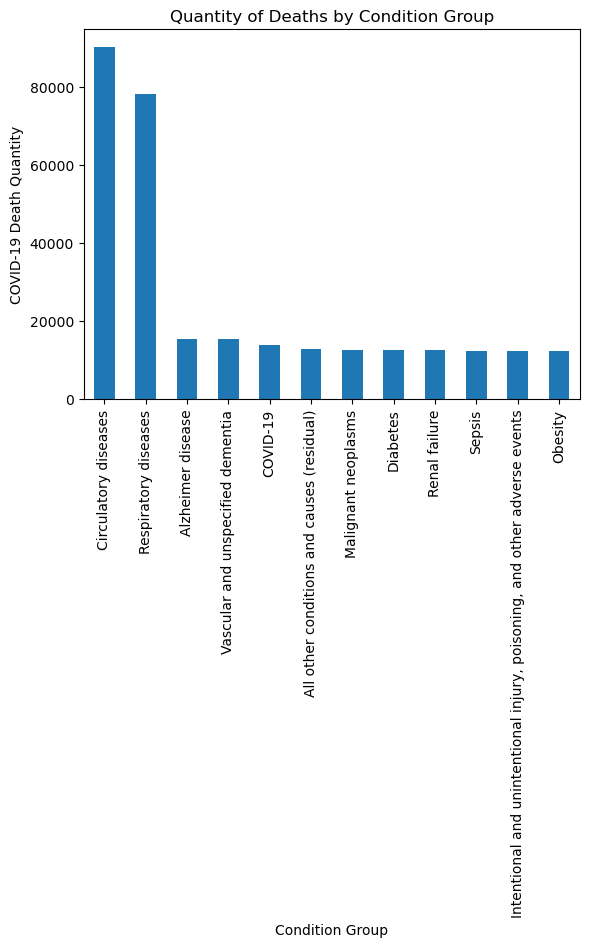

In [3]:
#Number of deaths by Condition group in the US

total_quant_death = clean_df.groupby('Condition Group')['COVID-19 Deaths'].count()
total_quant_death = total_quant_death.sort_values(ascending=False)
total_quant_death.plot(kind='bar')
plt.xlabel('Condition Group')
plt.ylabel('COVID-19 Death Quantity')
plt.title('Quantity of Deaths by Condition Group')
plt.show()


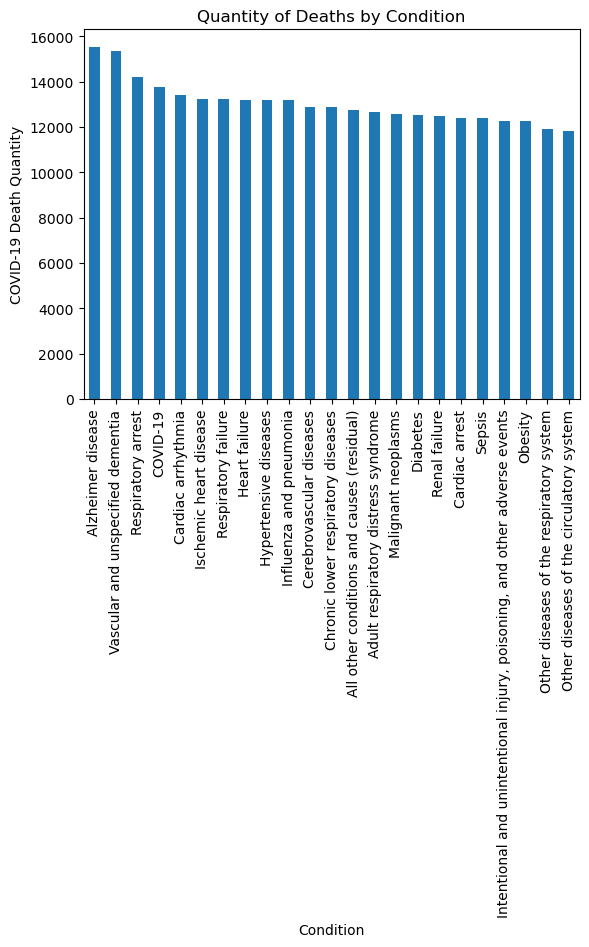

In [4]:
#Number of deaths by individual condition in the US
total_quant_death = clean_df.groupby('Condition')['COVID-19 Deaths'].count()
total_quant_death = total_quant_death.sort_values(ascending=False)
total_quant_death.plot(kind='bar')
plt.xlabel('Condition')
plt.ylabel('COVID-19 Death Quantity')
plt.title('Quantity of Deaths by Condition')
plt.show()

In [52]:
#DF 2020
year = 2020 
values_to_drop = ['United States', 'New York', 'Puerto Rico']
clean_df = clean_df.drop(clean_df[clean_df['State'].isin(values_to_drop)].index)
df_year = clean_df[clean_df['Year'] == year]
grouped = df_year.groupby('State')['COVID-19 Deaths'].sum()
df_grouped = pd.DataFrame({'State': grouped.index, 'COVID-19 Deaths': grouped.values})
df_grouped = df_grouped.sort_values('COVID-19 Deaths', ascending = False)

df_grouped.head(50)




,State,COVID-19 Deaths
4,California,135969
43,Texas,127240
9,Florida,85539
32,New York City,66448
30,New Jersey,64704
38,Pennsylvania,63012
13,Illinois,58617
35,Ohio,50777
22,Michigan,39171
14,Indiana,36771


In [53]:

#DF 2021
year = 2021 
values_to_drop = ['United States', 'New York', 'Puerto Rico']
clean_df = clean_df.drop(clean_df[clean_df['State'].isin(values_to_drop)].index)
df_year_2 = clean_df[clean_df['Year'] == year]
grouped_2 = df_year_2.groupby('State')['COVID-19 Deaths'].sum()
df_grouped_2 = pd.DataFrame({'State': grouped_2.index, 'COVID-19 Deaths': grouped_2.values})
df_grouped_2 = df_grouped_2.sort_values('COVID-19 Deaths', ascending = False)

df_grouped_2.head(50)

,State,COVID-19 Deaths
4,California,202929
43,Texas,188130
9,Florida,145836
38,Pennsylvania,76078
35,Ohio,73934
10,Georgia,60666
33,North Carolina,53888
2,Arizona,49638
22,Michigan,49437
42,Tennessee,47538


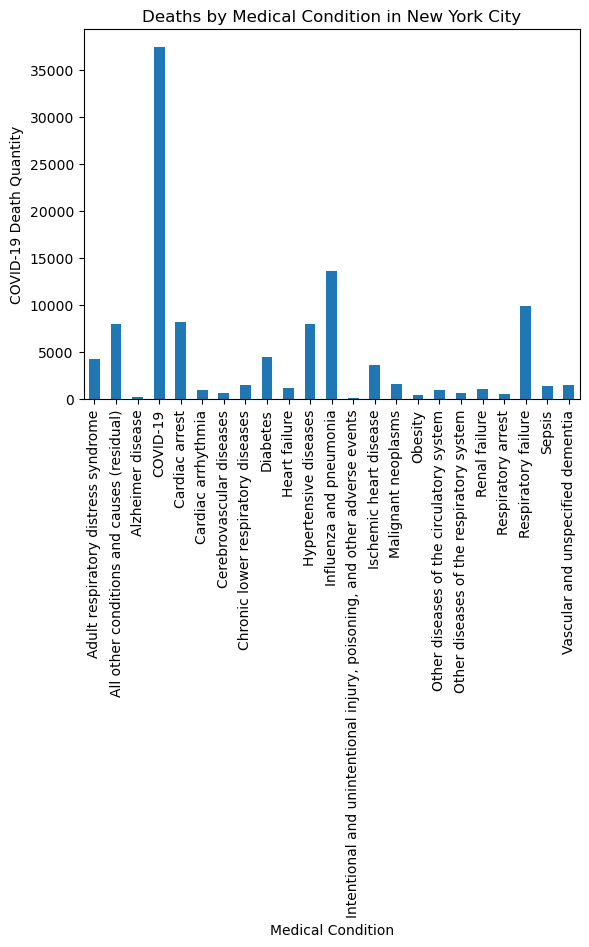

In [5]:
#Breakdown of deaths by condition group for New York City

state_name = 'New York City'
clean_df_filtered = clean_df[clean_df['State'] == state_name]
grouped_data = clean_df_filtered.groupby('Condition')['COVID-19 Deaths'].sum()
grouped_data.plot(kind='bar', rot=0)
grouped_data.plot(kind='bar')
plt.xlabel('Medical Condition')
plt.ylabel('COVID-19 Death Quantity')
plt.title('Deaths by Medical Condition in ' + state_name)
plt.show()





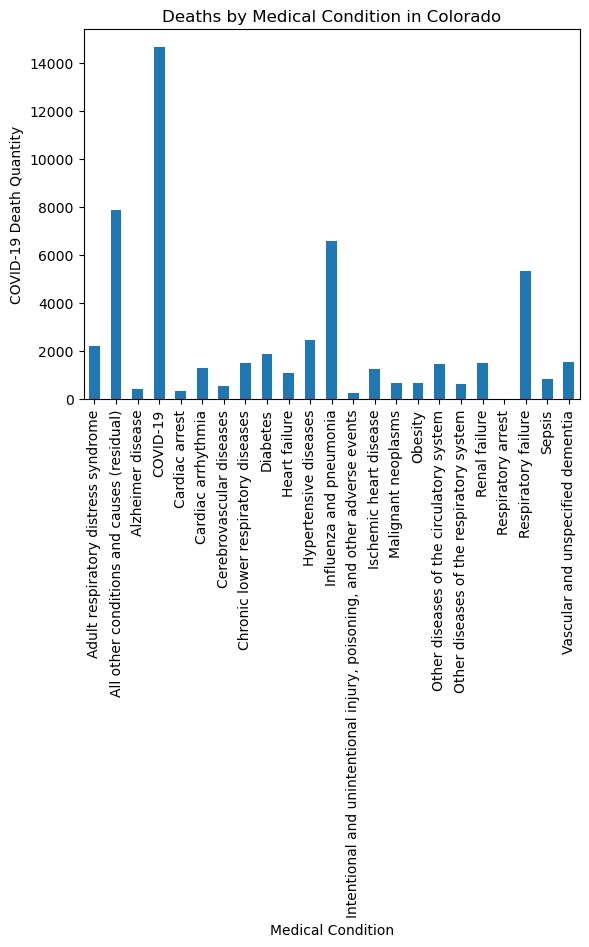

In [6]:
#Breakdown of deaths by condition group for Colorado
state_name_2 = 'Colorado'
clean_df_filtered = clean_df[clean_df['State'] == state_name_2]
grouped_data = clean_df_filtered.groupby('Condition')['COVID-19 Deaths'].sum()
grouped_data.plot(kind='bar', rot=0)
grouped_data.plot(kind='bar')
plt.xlabel('Medical Condition')
plt.ylabel('COVID-19 Death Quantity')
plt.title('Deaths by Medical Condition in ' + state_name_2)
plt.show()


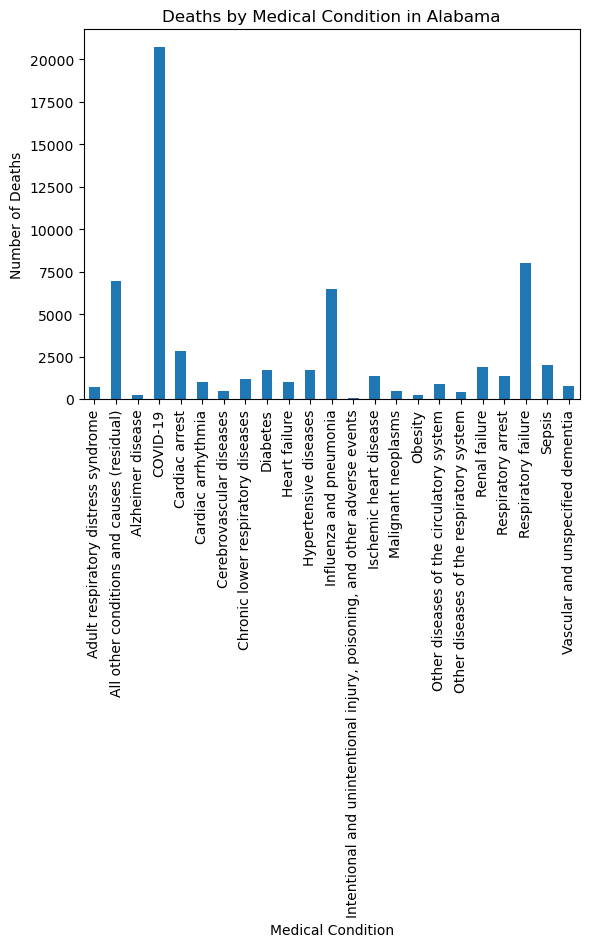

In [79]:
#Breakdown of deaths by condition group for Alabama
state_name_3 = 'Alabama'
clean_df_filtered = clean_df[clean_df['State'] == state_name_3]
grouped_data = clean_df_filtered.groupby('Condition')['COVID-19 Deaths'].sum()
grouped_data.plot(kind='bar', rot=0)
grouped_data.plot(kind='bar')
plt.xlabel('Medical Condition')
plt.ylabel('Number of Deaths')
plt.title('Deaths by Medical Condition in ' + state_name_3)
plt.show()

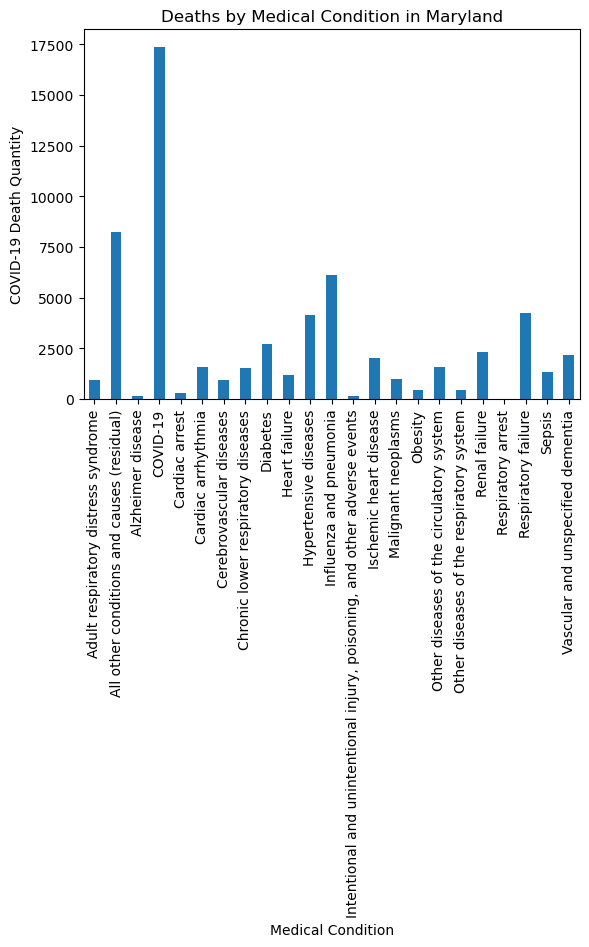

In [7]:
#Breakdown of deaths by condition group for Maryland
state_name_4 = 'Maryland'
clean_df_filtered = clean_df[clean_df['State'] == state_name_4]
grouped_data = clean_df_filtered.groupby('Condition')['COVID-19 Deaths'].sum()
grouped_data.plot(kind='bar', rot=0)
grouped_data.plot(kind='bar')
plt.xlabel('Medical Condition')
plt.ylabel('COVID-19 Death Quantity')
plt.title('Deaths by Medical Condition in ' + state_name_4)
plt.show()

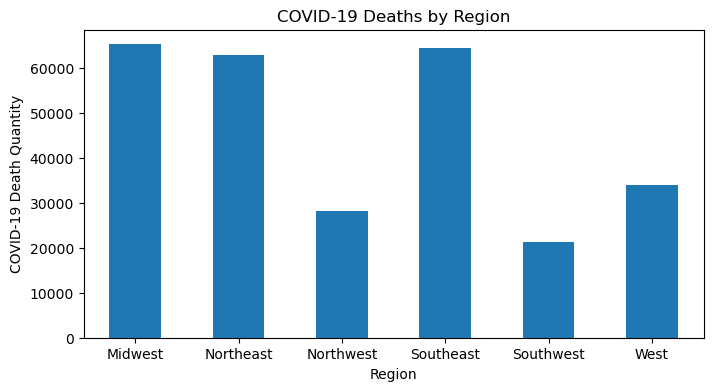

In [8]:


# Dictionary for each state
region_map = {
    'Alabama': 'Southeast',
    'Alaska': 'Northwest',
    'Arizona': 'Southwest',
    'Arkansas': 'Southeast',
    'California': 'West',
    'Colorado': 'West',
    'Connecticut': 'Northeast',
    'Delaware': 'Northeast',
    'Florida': 'Southeast',
    'Georgia': 'Southeast',
    'Hawaii': 'West',
    'Idaho': 'Northwest',
    'Illinois': 'Midwest',
    'Indiana': 'Midwest',
    'Iowa': 'Midwest',
    'Kansas': 'Midwest',
    'Kentucky': 'Southeast',
    'Louisiana': 'Southeast',
    'Maine': 'Northeast',
    'Maryland': 'Northeast',
    'Massachusetts': 'Northeast',
    'Michigan': 'Midwest',
    'Minnesota': 'Midwest',
    'Mississippi': 'Southeast',
    'Missouri': 'Midwest',
    'Montana': 'Northwest',
    'Nebraska': 'Midwest',
    'Nevada': 'West',
    'New Hampshire': 'Northeast',
    'New Jersey': 'Northeast',
    'New Mexico': 'Southwest',
    'New York': 'Northeast',
    'North Carolina': 'Southeast',
    'North Dakota': 'Midwest',
    'Ohio': 'Midwest',
    'Oklahoma': 'Southwest',
    'Oregon': 'Northwest',
    'Pennsylvania': 'Northeast',
    'Rhode Island': 'Northeast',
    'South Carolina': 'Southeast',
    'South Dakota': 'Midwest',
    'Tennessee': 'Southeast',
    'Texas': 'Southwest',
    'Utah': 'West',
    'Vermont': 'Northeast',
    'Virginia': 'Southeast',
    'Washington': 'Northwest',
    'West Virginia': 'Southeast',
    'Wisconsin': 'Midwest',
    'Wyoming': 'West',
}

# New column state to region
clean_df['region'] = clean_df['State'].map(region_map)

# Group data into region and count deaths
grouped_data_2 = clean_df.groupby('region')['COVID-19 Deaths'].count()

# Plot
plt.figure(figsize=(8,4))
grouped_data_2.plot(kind='bar', rot=0)
plt.xlabel('Region')
plt.ylabel('COVID-19 Death Quantity')
plt.title('COVID-19 Deaths by Region')

# Show graph
plt.show()

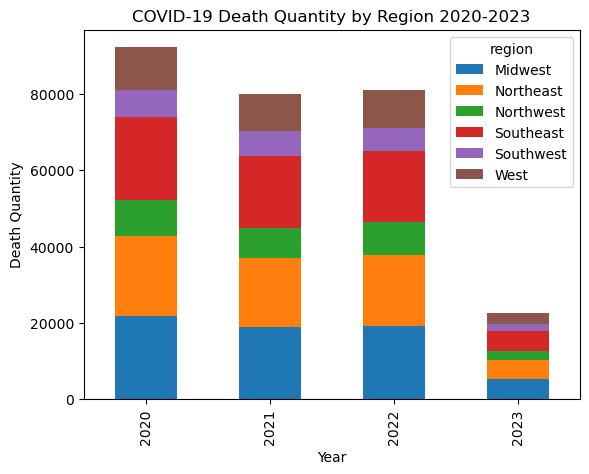

In [9]:


clean_df['Region'] = clean_df['State'].map(region_map)
grouped_data = clean_df.groupby(['region', 'Year'])['COVID-19 Deaths'].count().reset_index()
pivoted_data = grouped_data.pivot(index='Year', columns='region', values='COVID-19 Deaths')
pivoted_data.plot(kind='bar', stacked=True)
plt.xlabel('Year')
plt.ylabel('Death Quantity')
plt.title('COVID-19 Death Quantity by Region 2020-2023')
plt.show()